In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load cleaned data (from previous steps)
df = pd.read_csv("MentalHealth.csv")

# Keep only relevant columns (you can customize)
features = ['Age', 'Gender', 'family_history', 'work_interfere', 'no_employees',
            'remote_work', 'tech_company', 'benefits', 'care_options',
            'wellness_program', 'seek_help', 'anonymity', 'leave',
            'mental_health_consequence', 'phys_health_consequence',
            'coworkers', 'supervisor', 'mental_health_interview',
            'phys_health_interview', 'mental_vs_physical', 'obs_consequence']

# Filter dataset
df = df[features + ['treatment']]

# Encode target variable
df['treatment'] = df['treatment'].map({'Yes': 1, 'No': 0})


In [4]:
# Encode all categorical variables
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])


In [5]:
X = df.drop("treatment", axis=1)
y = df["treatment"]

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
#Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.66      0.79      0.72       122
           1       0.76      0.63      0.69       133

    accuracy                           0.71       255
   macro avg       0.71      0.71      0.71       255
weighted avg       0.72      0.71      0.70       255



In [10]:
#random forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest:\n", classification_report(y_test, y_pred_rf))


Random Forest:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77       122
           1       0.79      0.79      0.79       133

    accuracy                           0.78       255
   macro avg       0.78      0.78      0.78       255
weighted avg       0.78      0.78      0.78       255



In [11]:
#SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM:\n", classification_report(y_test, y_pred_svm))


SVM:
               precision    recall  f1-score   support

           0       0.69      0.77      0.73       122
           1       0.76      0.68      0.72       133

    accuracy                           0.73       255
   macro avg       0.73      0.73      0.73       255
weighted avg       0.73      0.73      0.73       255



In [12]:
from sklearn.model_selection import GridSearchCV

# Example: Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20]
}

grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='f1')
grid_rf.fit(X_train, y_train)

print("Best Params RF:", grid_rf.best_params_)
y_pred_grid_rf = grid_rf.predict(X_test)
print("Tuned Random Forest:\n", classification_report(y_test, y_pred_grid_rf))


Best Params RF: {'max_depth': 10, 'n_estimators': 100}
Tuned Random Forest:
               precision    recall  f1-score   support

           0       0.78      0.79      0.78       122
           1       0.80      0.80      0.80       133

    accuracy                           0.79       255
   macro avg       0.79      0.79      0.79       255
weighted avg       0.79      0.79      0.79       255



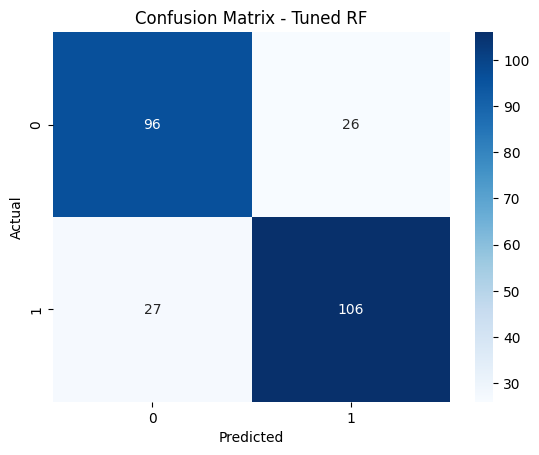

In [13]:
sns.heatmap(confusion_matrix(y_test, y_pred_grid_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Tuned RF")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
